In [1]:
 # Import Python libaries
%matplotlib inline
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, rcParams

import seaborn as sns
#import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
#from xgboost import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# Machine learning & model visualization tools
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process.kernels import Matern as MaternKernel, _check_length_scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.optimize import _check_optimize_result
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
from scipy.optimize import minimize
from scipy import stats 

# from sklearn.externals import joblib
# Miscellaneous
import os
import io
#import pydot
import math
from autooed.utils.pareto import convert_minimization
from pymoo.performance_indicator.hv import Hypervolume
from autooed.utils.pareto import find_pareto_front
from scipy.interpolate import BSpline, make_interp_spline

from autooed.utils.plot import plot_performance_space, plot_performance_metric, plot_performance_space_diffcolor
global_split_rand = 2571

# custom functions 
from gp import Matern

/home/kianoosh/anaconda3/envs/autooed/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 0, '!!!Ariaaaal')

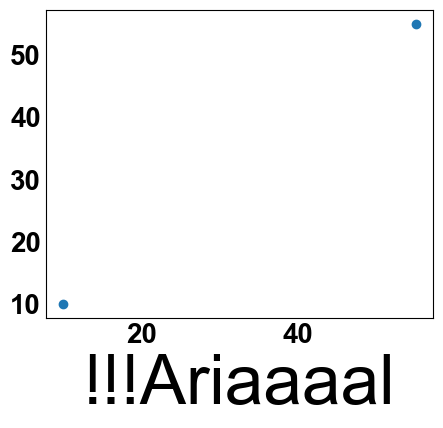

In [2]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

# Fix the samples that rounding resulted in negative values for the last one.
 #97:  [ 0.31	0.09	0.20	0.40	0.01	-1.000000e-02 generated one]
 real one: [0.30701378 0.08708877 0.19961717 0.39865702 0.00716017]
 evaluated one:  [0.31 0.09 0.2 0.4 0.0 0.0]

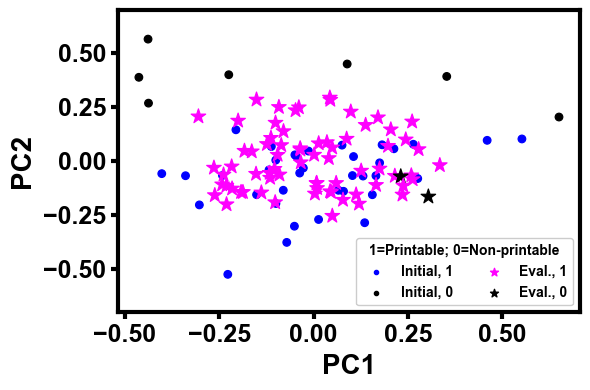

In [3]:
# Fix the samples that rounding resulted in 
df_eval = pd.read_csv('new_evaluated_keep.csv',)
df_eval ['Toughness(MJ/m3)'] = -df_eval ['Toughness(MJ/m3)']
df_eval ['Tensile_Strength(MPa)'] = -df_eval ['Tensile_Strength(MPa)']
#df_eval_nozero = pd.read_csv('new_evaluated_nonzero_keep.csv',)
df_init = pd.read_csv('./Yuchao_20220816_keep.csv',)
df_init['Printability'] = df_init['Printability'].map(dict(Y=1, N=0))
x_eval = df_eval.iloc[:, 1:6]
x_init = df_init.iloc[:, 1:6]
# PCA Dimension Reduction
pca = PCA(n_components=2)
x_eval_pca = pca.fit_transform(x_eval)
x_init_pca = pca.fit_transform(x_init)

df_eval ['pca1'] = x_eval_pca[:, 0]
df_eval ['pca2'] = x_eval_pca[:, 1]

df_init ['pca1'] = x_init_pca[:, 0]
df_init ['pca2'] = x_init_pca[:, 1]

df_eval['initial'] = 'Eval.'
df_init['initial'] = 'Initial'
df = pd.concat([df_init, df_eval], axis=0)

# do not delet the non-printable cases.
fig, ax = plt.subplots(figsize=(6, 4))
hue = df['initial'].astype(str) + ', ' + df['Printability'].astype(str)
label = ['Init., Printable','Init., Non-printable', 'Eval., Printable','Eval., Non-printable']
sns.scatterplot(data=df, x='pca1', y='pca2', 
                 markers=['.', '.', '*', '*'], edgecolor=None, palette=['blue', 'black', 'magenta', 'black'], hue=hue, style=hue,#hue='initial',
             alpha=1, s=120,  )#label='Evaluated')
plt.ylim(-0.7, 0.7)


plt.legend(ncol=2, title='1=Printable; 0=Non-printable', framealpha=1)

ax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('pca_printable_non.jpeg', dpi=500)

In [4]:
Tg = df['Tg']
Tg_group = [1 if 9.9<i<60.1 else 0 for i in Tg]
sum (Tg_group)

88

In [5]:
43-28

15

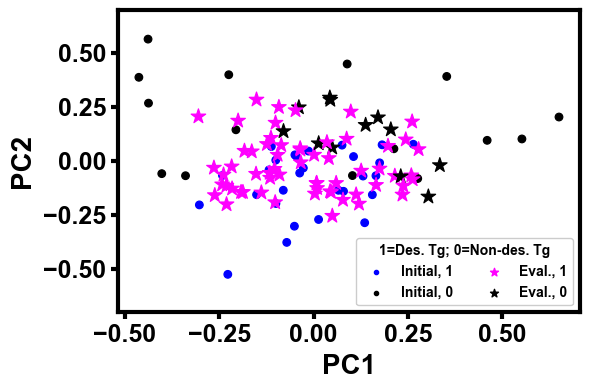

In [6]:
# Fix the samples that rounding resulted in 
df_eval = pd.read_csv('new_evaluated_keep.csv',)
df_eval ['Toughness(MJ/m3)'] = -df_eval ['Toughness(MJ/m3)']
df_eval ['Tensile_Strength(MPa)'] = -df_eval ['Tensile_Strength(MPa)']
#df_eval_nozero = pd.read_csv('new_evaluated_nonzero_keep.csv',)
df_init = pd.read_csv('./Yuchao_20220816_keep.csv',)
df_init['Printability'] = df_init['Tg'].map(dict(Y=1, N=0))
x_eval = df_eval.iloc[:, 1:6]
x_init = df_init.iloc[:, 1:6]
# PCA Dimension Reduction
pca = PCA(n_components=2)
x_eval_pca = pca.fit_transform(x_eval)
x_init_pca = pca.fit_transform(x_init)

df_eval ['pca1'] = x_eval_pca[:, 0]
df_eval ['pca2'] = x_eval_pca[:, 1]

df_init ['pca1'] = x_init_pca[:, 0]
df_init ['pca2'] = x_init_pca[:, 1]

df_eval['initial'] = 'Eval.'
df_init['initial'] = 'Initial'
df = pd.concat([df_init, df_eval], axis=0)

Tg = df['Tg']
Tg_group = [1 if 9.9<i<60.1 else 0 for i in Tg]
df['Tg_group'] = Tg_group
# do not delet the non-printable cases.
fig, ax = plt.subplots(figsize=(6, 4))
hue = df['initial'].astype(str) + ', ' + df['Tg_group'].astype(str)
label = ['Init., Printable','Init., Non-printable', 'Eval., Printable','Eval., Non-printable']
sns.scatterplot(data=df, x='pca1', y='pca2', 
                 markers=['.', '.', '*', '*'], edgecolor=None, palette=['blue', 'black', 'magenta', 'black'], hue=hue, style=hue,#hue='initial',
             alpha=1, s=120,  )#label='Evaluated')
plt.ylim(-0.7, 0.7)


plt.legend(ncol=2, title='1=Des. Tg; 0=Non-des. Tg', framealpha=1)

ax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('pca_tg_non.jpeg', dpi=500)

In [7]:
# Fix the samples that rounding resulted in 
df_eval = pd.read_csv('new_evaluated_nonzero_keep.csv',)
df_eval ['Toughness(MJ/m3)'] = -df_eval ['Toughness(MJ/m3)']
df_eval ['Tensile_Strength(MPa)'] = -df_eval ['Tensile_Strength(MPa)']
#df_eval_nozero = pd.read_csv('new_evaluated_nonzero_keep.csv',)
df_init = pd.read_csv('./Yuchao_20220816_nonzero_keep.csv',)
df_init['Printability'] = df_init['Printability'].map(dict(Y=1, N=0))
x_eval = df_eval.iloc[:, 1:6]
x_init = df_init.iloc[:, 1:6]

In [8]:
# TSNE Dimension Reduction
tsne = TSNE(init='pca', n_iter=10000, learning_rate='auto', perplexity=9
, random_state=10, verbose=1)
x_eval_tsne = tsne.fit_transform(x_eval)
x_init_tsne = tsne.fit_transform(x_init)

df_eval ['tsne1'] = x_eval_tsne[:, 0]
df_eval ['tsne2'] = x_eval_tsne[:, 1]

df_init ['tsne1'] = x_init_tsne[:, 0]
df_init ['tsne2'] = x_init_tsne[:, 1]

[t-SNE] Computing 28 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 0.114505
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.952923
[t-SNE] KL divergence after 1300 iterations: 0.430033
[t-SNE] Computing 28 nearest neighbors...
[t-SNE] Indexed 36 samples in 0.000s...
[t-SNE] Computed neighbors for 36 samples in 0.129s...
[t-SNE] Computed conditional probabilities for sample 36 / 36
[t-SNE] Mean sigma: 0.153229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.258644
[t-SNE] KL divergence after 1750 iterations: 0.223922


In [9]:
# PCA Dimension Reduction
pca = PCA(n_components=2)

x_eval_pca = pca.fit_transform(x_eval)
x_init_pca = pca.fit_transform(x_init)

df_eval ['pca1'] = x_eval_pca[:, 0]
df_eval ['pca2'] = x_eval_pca[:, 1]

df_init ['pca1'] = x_init_pca[:, 0]
df_init ['pca2'] = x_init_pca[:, 1]

In [10]:
df_init['Printability'] = df_init['Printability'].map(dict(Y=1, N=0))

In [11]:
df_eval['initial'] = 'Eval.'
df_init['initial'] = 'Initial'
df = pd.concat([df_init, df_eval], axis=0)
X = df.iloc[:, 1:6]

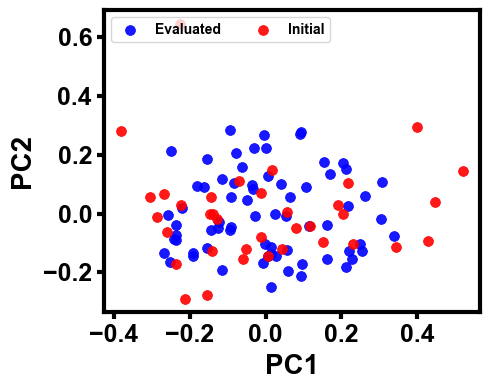

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_eval, x='pca1', y='pca2', 
                 markers='*', edgecolor=None, color='blue', 
             alpha=0.9, s=50,  label='Evaluated')

sns.scatterplot(data=df_init, x='pca1', y='pca2', 
                 markers=markers, edgecolor=None, color='red',
             alpha=0.9, s=50,  label='Initial')

ax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend(ncol=2, loc='upper left')
plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('eval_init_samples_pca.jpeg', dpi=500)

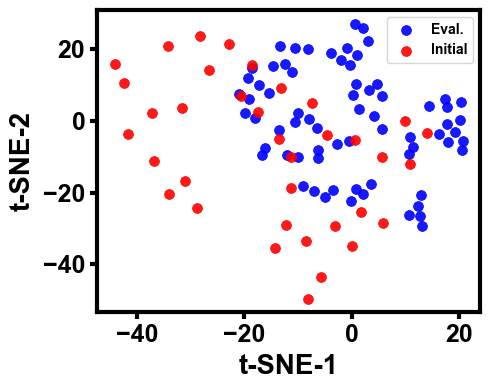

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_eval, x='tsne1', y='tsne2', 
                 markers='*', edgecolor=None, color='blue',
             alpha=0.9, s=50, label='Eval.')

sns.scatterplot(data=df_init, x='tsne1', y='tsne2', 
                 markers=markers, edgecolor=None, color='red',
             alpha=0.9, s=50, label='Initial')
plt.legend()

ax.set_xlabel('t-SNE-1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('t-SNE-2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('eval_init_samples_tsne.jpeg', dpi=500)

In [14]:
# PCA Dimension Reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

df ['pca1'] = x_pca[:, 0]
df ['pca2'] = x_pca[:, 1]


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



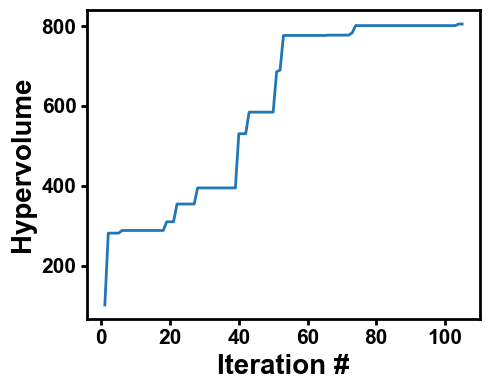

In [15]:
Strength = -df['Tensile_Strength(MPa)']
Toughness = -df['Toughness(MJ/m3)']
Y = []
for i, j in zip(Strength, Toughness):
    Y.append([i, j])
Y = np.array(Y)
plot_performance_metric (Y, ['min', 'min'])

In [16]:
# calculate the Pareto Front
pareto = find_pareto_front(Y)
pareto[:, 0]

array([-49.99, -32.03, -31.22, -17.82, -15.1 ])

In [17]:
df['Toughness(MJ/m3)']

0      2.33
1     12.47
2      0.69
3      0.70
4      2.15
      ...  
65     0.62
66     1.33
67     7.58
68     0.29
69    18.29
Name: Toughness(MJ/m3), Length: 106, dtype: float64

In [18]:
pareto_id = []
for i in range(len(df)) :
    if df['Tensile_Strength(MPa)'].iloc[i] in -pareto[:, 0]:
        if df['Toughness(MJ/m3)'].iloc[i] in -pareto[:, 1]:
            pareto_id.append(i)
df_pareto = df.iloc[pareto_id]
df_pareto['Toughness(MJ/m3)']

14    25.76
16    22.56
36    25.02
37     2.75
67     7.58
Name: Toughness(MJ/m3), dtype: float64

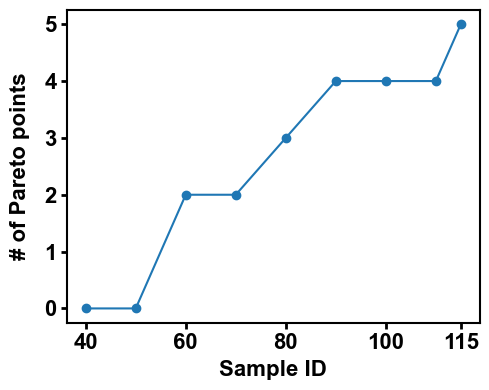

In [19]:
# manually find what iteration each pareto discoverd
#array([[-49.99,  -2.75] --> 81
#       [-32.03,  -7.58]--> 113
#      [-31.22, -22.56] --> 60
#      [-17.82, -25.02] --> 80
#      [-15.1 , -25.76]]) --> 58
fig, ax = plt.subplots(figsize=(5, 4))
iterations = np.arange(40, 121, 10)
iterations[-1] = 115
pareto_cont = [0, 0, 2, 2, 3, 4, 4, 4, 5]
plt.scatter(iterations, pareto_cont)
plt.plot(iterations, pareto_cont)

plt.xticks([40, 60, 80, 100, 115])
ax.set_xlabel('Sample ID', fontsize='16', fontname='Arial', 
              fontweight='bold', labelpad=5)
ax.set_ylabel('# of Pareto points', fontsize='16', fontname='Arial', 
              fontweight='bold', labelpad=10)

ax.tick_params(direction='out', length=4, width=2, colors='black', 
               grid_alpha=1, labelsize='16')

[i.set_linewidth(1.5) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('numParet_iters.png', dpi=500)

In [20]:
iterations = np.arange(50, 121, 10)
iterations

array([ 50,  60,  70,  80,  90, 100, 110, 120])

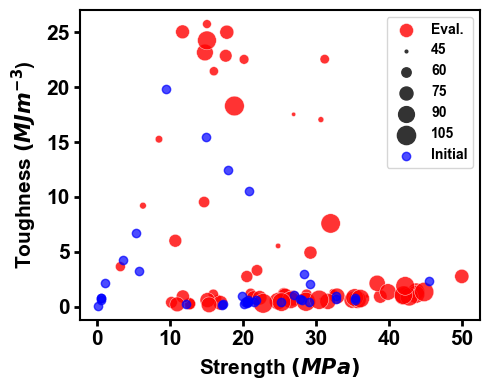

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot (x='Tensile_Strength(MPa)', y='Toughness(MJ/m3)', size='sample', color='red', sizes=(1, 200), label='Eval.',
                 alpha=.8, palette=["red"], data=df_eval)
plt.scatter (df_init['Tensile_Strength(MPa)'], df_init['Toughness(MJ/m3)'], label='Initial', 
             alpha=0.7, color='blue',)
plt.legend()
#plt.legend(['','','','','', 
 #           'Eval.','Init.'])


ax.set_xlabel('Strength $(MPa)$', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Toughness $({MJ}{m^{-3}}$)', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=4, width=2, colors='black', 
               grid_alpha=1, labelsize='15')
#plt.scatter (-pareto[:, 0], -pareto[:, 1], facecolors='none', edgecolors='black')

[i.set_linewidth(1.5) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('evaluate_init.png', dpi=500)

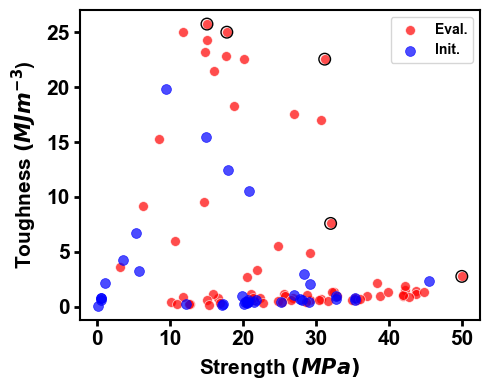

In [22]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot (x='Tensile_Strength(MPa)', y='Toughness(MJ/m3)', color='red', s=50, label='Eval.',
                 alpha=.7, palette=["red"], data=df_eval)

sns.scatterplot (x='Tensile_Strength(MPa)', y='Toughness(MJ/m3)', color='blue', s=50, label='Init.', edgecolor=None, 
                 alpha=.7, palette=["blue"], data=df_init)
plt.legend()
ax.set_xlabel('Strength $(MPa)$', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Toughness $({MJ}{m^{-3}}$)', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=4, width=2, colors='black', 
               grid_alpha=1, labelsize='15')
plt.scatter (-pareto[:, 0], -pareto[:, 1], facecolors='none', s=70, edgecolors='black', marker='o', alpha=1)
pareto_df = pd.DataFrame({})
pareto_df ['strength'] = -pareto[:, 0]
pareto_df ['toughness'] = -pareto[:, 1]
pareto_df_sort_str = pareto_df.sort_values(by='strength')
new_iters = np.arange(pareto_df_sort_str['strength'].iloc[0], 
                      pareto_df_sort_str['strength'].iloc[-1], 0.1)
gfg_str = make_interp_spline(pareto_df_sort_str['strength'], 
                             pareto_df_sort_str['toughness'], k=1)
strength_new = gfg_str(new_iters)
#plt.plot(new_iters, strength_new, '--k')

[i.set_linewidth(1.5) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('evaluate_init_pareto_nosize.png', dpi=500)

In [23]:
pareto_df_sort_str

,strength,toughness
4,15.10,25.76
3,17.82,25.02
2,31.22,22.56
1,32.03,7.58
0,49.99,2.75


In [24]:
def calc_hypervolume(Y, ref_point, obj_type=None):
    '''
    Calculate hypervolume
    '''
    #Y = convert_minimization(Y, obj_type)

    return Hypervolume(ref_point=ref_point).calc(Y)

hypervolume = calc_hypervolume (Y, (0, 0), )
print (hypervolume)

814.8641999999999


In [25]:
Strength = df_init['Tensile_Strength(MPa)']
Toughness = df_init['Toughness(MJ/m3)']
Y_initial = []
for i, j in zip(Strength, Toughness):
    Y_initial.append([i, j])
Y_initial = np.array(Y_initial)
Y_initial

array([[45.51,  2.33],
       [17.95, 12.47],
       [32.74,  0.69],
       [27.81,  0.7 ],
       [ 1.2 ,  2.15],
       [28.33,  2.97],
       [20.54,  0.32],
       [27.03,  1.05],
       [35.42,  0.64],
       [21.52,  0.4 ],
       [20.23,  0.23],
       [29.07,  0.45],
       [20.54,  0.41],
       [17.16,  0.17],
       [19.83,  0.99],
       [29.19,  2.06],
       [ 5.35,  6.68],
       [32.72,  0.93],
       [20.8 , 10.57],
       [25.27,  0.38],
       [20.76,  0.62],
       [14.97, 15.49],
       [20.74,  0.37],
       [ 5.83,  3.27],
       [20.33,  0.41],
       [28.13,  0.59],
       [21.79,  0.6 ],
       [ 9.55, 19.8 ],
       [ 3.67,  4.28],
       [ 0.57,  0.75],
       [ 0.53,  0.77],
       [ 0.59,  0.6 ],
       [ 0.2 ,  0.09],
       [35.33,  0.78],
       [17.35,  0.24],
       [12.22,  0.24]])

In [26]:
Strength = df_eval['Tensile_Strength(MPa)']
Toughness = df_eval['Toughness(MJ/m3)']
Y_eval = []
for i, j in zip(Strength, Toughness):
    Y_eval.append([i, j])
Y_eval = np.array(Y_eval)
Y_eval

array([[29.22,  0.62],
       [30.68,  0.7 ],
       [36.98,  0.94],
       [26.97, 17.53],
       [32.56,  1.35],
       [24.84,  5.53],
       [30.7 , 17.05],
       [32.28,  1.33],
       [ 6.34,  9.2 ],
       [20.44,  0.53],
       [ 8.53, 15.26],
       [16.59,  0.75],
       [21.56,  0.59],
       [42.27,  1.49],
       [15.1 , 25.76],
       [16.05, 21.46],
       [31.22, 22.56],
       [20.18, 22.54],
       [ 3.25,  3.64],
       [15.97,  1.12],
       [12.83,  0.23],
       [21.08,  1.18],
       [28.74,  1.09],
       [14.71,  9.53],
       [21.95,  3.3 ],
       [10.24,  0.38],
       [20.56,  2.74],
       [12.7 ,  0.26],
       [25.61,  1.15],
       [17.67, 22.87],
       [10.77,  6.  ],
       [29.27,  4.92],
       [11.8 ,  0.91],
       [38.83,  0.92],
       [21.46,  0.81],
       [11.76, 25.05],
       [17.82, 25.02],
       [49.99,  2.75],
       [22.32,  0.8 ],
       [16.94,  0.34],
       [11.03,  0.2 ],
       [15.17,  0.59],
       [25.8 ,  0.97],
       [26.

In [27]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [28]:
Y = -Y

In [29]:
np.min(Y_eval[:, 0])

3.25

In [30]:
(np.sqrt(1e-3), np.sqrt(1e3))

(0.03162277660168379, 31.622776601683793)

In [116]:
n_var = 5
nu1 = 1
nu2 = 1
main_kernel1 = Matern(length_scale=2*np.ones(n_var), length_scale_bounds=(np.sqrt((5e-1)), np.sqrt(5e5)), nu = 0.5*nu1)
main_kernel2 = Matern(length_scale=2*np.ones(n_var), length_scale_bounds=(np.sqrt((1.5e-1)), np.sqrt(5e1)), nu = 0.5*nu2)

kernel1 = ConstantKernel(constant_value=1.0, constant_value_bounds=(np.sqrt(0.01), np.sqrt(35))) * main_kernel1 
kernel2 = ConstantKernel(constant_value=1.0, constant_value_bounds=(np.sqrt(0.01), np.sqrt(35))) * main_kernel2 
# RBF kernel
#main_kernel = RBF(length_scale=0.01*np.ones(n_var), length_scale_bounds=(np.sqrt(1e-3), np.sqrt(1e5)))
#kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(np.sqrt(6e-1), np.sqrt(0.2e3))) * main_kernel 
#kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(np.sqrt(6e-1), np.sqrt(0.2e2))) * RBF(length_scale=10, length_scale_bounds=(0.0, 10.0)) + 50*main_kernel

In [149]:

def constrained_optimization(obj_func, initial_theta, bounds):
    '''
    Customized version of constrained optimization to avoid convergence warning.
    '''
    opt_res = minimize(obj_func, initial_theta, method="L-BFGS-B", jac=True, bounds=bounds)
    # NOTE: Temporarily disable the checking below because of the numerical instability sometimes.
    _check_optimize_result("lbfgs", opt_res)
    return opt_res.x, opt_res.fun
gpr_strength = GaussianProcessRegressor(kernel=kernel1, optimizer=constrained_optimization, alpha=0.2)
gpr_toughness = GaussianProcessRegressor(kernel=kernel2, optimizer=constrained_optimization, alpha=0.1)

In [179]:
errors_strength0 = []
pred_strength = []
sdt_strength = []
i=0
X = np.array (X)
Y = np.array (Y)
for i in range (0, len(Y_eval)):
        gpr_strength = gpr_strength.fit(X[0:len(Y_initial)+i, :], Y[0:len(Y_initial)+i, 0])
        x_next = np.array (X[len(Y_initial) + i, :])
        x_next = x_next.reshape (1, 5)
        y_next = np.array (Y[len(Y_initial) + i, 0])
        y_next = y_next.reshape(1, 1)
        try:
                y_nexts = np.array (Y[len(Y_initial) + i: len(Y_initial) + i+5,  1])
                y_nexts = y_nexts.reshape(5, 1)
                x_nexts = np.array (X[len(Y_initial) + i: len(Y_initial) + i+5, :])
                x_nexts = x_nexts.reshape (5, 5)
                score_strength = gpr_strength.score(x_nexts, y_nexts)
                #print (score_strength)
        except:
                pass

        gpr_strength_predict = gpr_strength.predict(x_next, return_std=True)
        pred_strength.append([gpr_strength_predict[0][0], y_next[0][0]])
        sdt_strength.append(gpr_strength_predict[1][0])

        #print (gpr_strength_predict, y_next)
        
        error = abs(gpr_strength_predict[0] - y_next)/y_next
        
        #print (error)
        errors_strength0.append(error)

errors_toughness0 = []
pred_toughness = []
sdt_toughness = []
for i in range (0, len(Y_eval)):
        gpr_toughness = gpr_toughness.fit(X[0:len(Y_initial)+i, :], Y[0:len(Y_initial)+i, 1])
        
        x_next = np.array (X[len(Y_initial) + i, :])
        x_next = x_next.reshape (1, 5)
        y_next = np.array (Y[len(Y_initial) + i, 1])
        y_next = y_next.reshape(1, 1)
        try:
                y_nexts = np.array (Y[len(Y_initial) + i: len(Y_initial) + i+5,  1])
                y_nexts = y_nexts.reshape(5, 1)
                x_nexts = np.array (X[len(Y_initial) + i: len(Y_initial) + i+5, :])
                x_nexts = x_nexts.reshape (5, 5)
                score_toughness = gpr_toughness.score(x_nexts, y_nexts)
                #print (score_toughness)
        except:
                pass

        gpr_toughness_predict = gpr_toughness.predict(x_next, return_std=True)
        pred_toughness.append([gpr_toughness_predict[0][0], y_next[0][0]])
        sdt_toughness.append(gpr_toughness_predict[1][0])
        #print (gpr_toughness_ppred_strength
        error = abs(gpr_toughness_predict[0] - y_next)/(y_next+1) # to not divide by a <1 number
        errors_toughness0.append(error)

[gpr_toughness_predict[0], y_next[0][0]]


[array([2.41219356]), 18.29]

PearsonRResult(statistic=0.49637069723565536, pvalue=1.2419286396045508e-05)
0.1621888937413709
PearsonRResult(statistic=0.6223596367425622, pvalue=8.838713960097825e-09)
0.3828332127492007


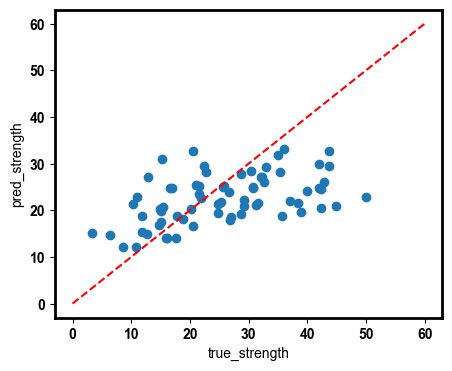

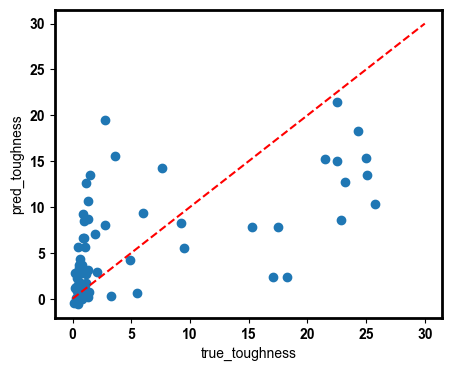

In [180]:
fig, ax = plt.subplots(figsize=(5, 4))
start_index = 0
end_index = 100
# pred_strength = [gp_pred, true_value]
pred_strength = np.array (pred_strength)
plt.scatter (pred_strength[start_index:end_index, 1], pred_strength[start_index:end_index, 0])
plt.xlabel('true_strength')
plt.ylabel('pred_strength')
plt.plot([0, 60], [0, 60], '--r')
print (pearsonr (pred_strength[start_index:end_index, 0], pred_strength[start_index:end_index, 1]))
print (r2_score (pred_strength[start_index:end_index, 1], pred_strength[start_index:end_index, 0], ))
fig, ax = plt.subplots(figsize=(5, 4))
# pred_strength = [gp_pred, true_value]
pred_toughness = np.array (pred_toughness)
pred_toughness[:, 0]
plt.scatter (pred_toughness[start_index:end_index, 1], pred_toughness[start_index:end_index, 0])
plt.plot([0, 30], [0, 30], '--r')
plt.xlabel('true_toughness')
plt.ylabel('pred_toughness')
print (pearsonr (pred_toughness[start_index:end_index, 0], pred_toughness[start_index:end_index, 1]))
print (r2_score (pred_toughness[start_index:end_index, 1], pred_toughness[start_index:end_index, 0]))

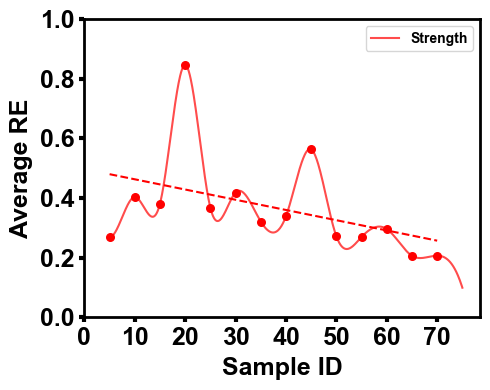

In [181]:
errors_strength_ = errors_strength0.copy()
errors_toughness_ = errors_toughness0.copy()
errors_strength = np.array(errors_strength0).reshape(len(Y_eval),1)
errors_toughness = np.array(errors_toughness0).reshape(len(Y_eval),1)

# calculates the average over every n evaluation
n = 5
iters = list(np.arange(0, len(Y_eval), n))
avgerrors_strength = np.average(errors_strength.reshape(-1, n), axis=1)
#avgerrors_strength[8] = 0.4
avgerrors_toughness = np.average(errors_toughness.reshape(-1, n), axis=1)

new_iters = np.arange(0, 70.1, 0.1)
gfg_str = make_interp_spline(iters, avgerrors_strength, bc_type='clamped',)
gfg_tough = make_interp_spline(iters, avgerrors_toughness, bc_type='clamped', )#bc_type='clamped', k=3)#k=2)


strength_new = gfg_str(new_iters)
toughness_new = gfg_tough(new_iters)

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
          avgerrors_strength, s=30, alpha=1, color='red')
#calculate equation for trendline
x = list(np.arange(0, len(Y_eval), n) + n)
y = avgerrors_strength
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(x, p(x), '--r')

#plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
#         avgerrors_toughness, s=30, alpha=0.7, color='blue')

#calculate equation for trendline
x = list(np.arange(0, len(Y_eval), n) + n)
y = avgerrors_toughness
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#add trendline to plot
#plt.plot(x, p(x), '--b')

plt.plot(new_iters + n, strength_new, color='red', label='Strength', alpha=0.7)
#plt.plot(new_iters + n, toughness_new, color='blue', label='Toughness', alpha=0.7)
plt.legend()
ax.set_xlabel('Sample ID', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Average RE', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=3.5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')
[i.set_linewidth(2) for i in ax.spines.values()]
plt.xticks((np.arange(0, 71, 10)))
plt.ylim((0, 1))
plt.tight_layout()
plt.savefig('AverageRE_strength.png', dpi=500)

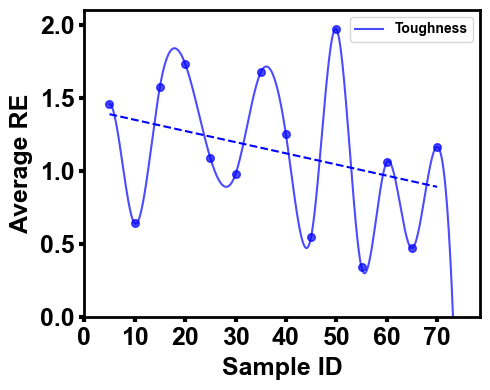

In [184]:
errors_strength_ = errors_strength0.copy()
errors_toughness_ = errors_toughness0.copy()
errors_strength = np.array(errors_strength0).reshape(len(Y_eval),1)
errors_toughness = np.array(errors_toughness0).reshape(len(Y_eval),1)

# calculates the average over every n evaluation
n = 5
iters = list(np.arange(0, len(Y_eval), n))
avgerrors_strength = np.average(errors_strength.reshape(-1, n), axis=1)
#avgerrors_strength[8] = 0.4
avgerrors_toughness = np.average(errors_toughness.reshape(-1, n), axis=1)

new_iters = np.arange(0, 70.1, 0.1)
gfg_str = make_interp_spline(iters, avgerrors_strength, bc_type='natural',)
gfg_tough = make_interp_spline(iters, avgerrors_toughness, k=3, bc_type='clamped', )#bc_type='clamped', k=3)#k=2)


strength_new = gfg_str(new_iters)
toughness_new = gfg_tough(new_iters)

fig, ax = plt.subplots(figsize=(5, 4))
#plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
#          avgerrors_strength, s=30, alpha=1, color='red')
#calculate equation for trendline
x = list(np.arange(0, len(Y_eval), n) + n)
y = avgerrors_strength
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#add trendline to plot
#plt.plot(x, p(x), '--r')

plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
         avgerrors_toughness, s=30, alpha=0.7, color='blue')

#calculate equation for trendline
x = list(np.arange(0, len(Y_eval), n) + n)
y = avgerrors_toughness
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(x, p(x), '--b')

#plt.plot(new_iters + n, strength_new, color='red', label='Strength', alpha=0.7)
plt.plot(new_iters + n, toughness_new, color='blue', label='Toughness', alpha=0.7)
plt.legend()
ax.set_xlabel('Sample ID', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Average RE', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=3.5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')
[i.set_linewidth(2) for i in ax.spines.values()]
plt.xticks((np.arange(0, 71, 10)))
plt.ylim((0, 2.1))
plt.tight_layout()
plt.savefig('AverageRE_toughness.png', dpi=500)

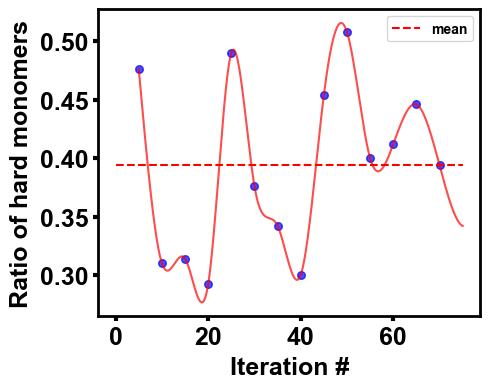

In [ ]:
x_eval = np.array (x_eval)
# calculates the average over every n evaluation
n = 5
iters = list(np.arange(0, len(Y_eval), n))
avgerrors_strength = np.average(pred_strength[:, 0].reshape(-1, n), axis=1)
x_eval_hard = x_eval [:, 2].ravel() + x_eval [:, 3].ravel() + x_eval [:, 4].ravel()
#x_eval_hard = 1-(x_eval [:, 0].ravel() + x_eval [:, 1].ravel() )
avg_x_eval_hard = np.average(x_eval_hard.reshape(-1, n), axis=1)
#plt.scatter (np.arange(0, len(avg_x_eval_hard)), avg_x_eval_hard,)

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
         avg_x_eval_hard, s=30, alpha=0.7, color='blue')

new_iters = np.arange(0, 70.1, 0.1)
gfg_str = make_interp_spline(iters, avg_x_eval_hard, k=3, bc_type='natural', check_finite=False) 

strength_new = gfg_str(new_iters)
plt.plot ([0, 75], [np.mean (x_eval_hard), np.mean (x_eval_hard)], '--r', label='mean')
plt.legend()
plt.plot(new_iters + n, strength_new, color='red', label='Strength', alpha=0.7)
plt.xlabel('Sample ID')
plt.ylabel('Ratio of hard monomers')

ax.set_xlabel('Sample ID', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Ratio of hard monomers', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=3.5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')
[i.set_linewidth(2) for i in ax.spines.values()]
plt.xticks((np.arange(0, 72, 20)))
plt.tight_layout()
plt.savefig('hardmonomers_iter.png', dpi=500)

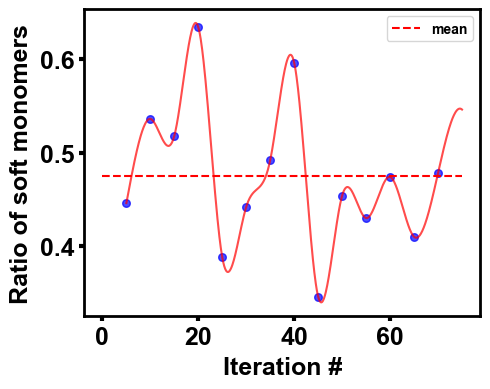

In [ ]:
x_eval = np.array (x_eval)
# calculates the average over every n evaluation
n = 5
iters = list(np.arange(0, len(Y_eval), n))
avgerrors_strength = np.average(pred_strength[:, 0].reshape(-1, n), axis=1)
x_eval_soft = x_eval [:, 0].ravel() + x_eval [:, 1].ravel() 
avg_x_eval_soft = np.average(x_eval_soft.reshape(-1, n), axis=1)
#plt.scatter (np.arange(0, len(avg_x_eval_soft)), avg_x_eval_soft,)

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
         avg_x_eval_soft, s=30, alpha=0.7, color='blue')

new_iters = np.arange(0, 70.1, 0.1)
gfg_str = make_interp_spline(iters, avg_x_eval_soft, k=3, bc_type='natural', check_finite=False) 

strength_new = gfg_str(new_iters)
plt.plot ([0, 75], [np.mean (x_eval_soft), np.mean (x_eval_soft)], '--r', label='mean')
plt.legend()
plt.plot(new_iters + n, strength_new, color='red', label='Strength', alpha=0.7)
plt.xlabel('Sample ID')
plt.ylabel('Ratio of soft monomers')

ax.set_xlabel('Sample ID', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Ratio of soft monomers', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=3.5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')
[i.set_linewidth(2) for i in ax.spines.values()]
plt.xticks((np.arange(0, 72, 20)))
plt.tight_layout()
plt.savefig('softmonomers_iter.png', dpi=500)

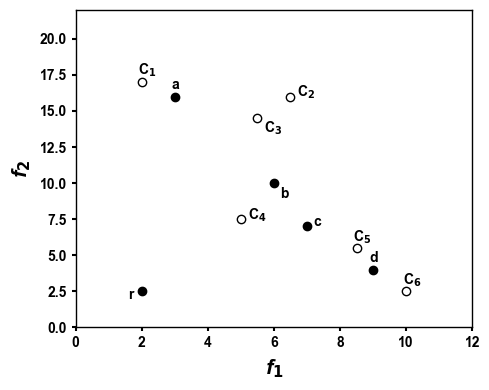

In [ ]:
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt

Xs = [3, 6, 7, 9, 2]
Ys = [16, 10, 7, 4, 2.5]
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(Xs, Ys, color='black')
list=['a', 'b', 'c', 'd', 'r']
shiftx = [-0.1, +0.2, 0.2, -0.1, -0.4]
shifty = [0.5, -1, 0., 0.5, -0.5, ]
for i, txt in enumerate(list):
    ax.annotate(txt, (Xs[i] + shiftx[i], Ys[i] + shifty[i]))
plt.xlim(0,12)
plt.ylim(0,22)

[i.set_linewidth(1) for i in ax.spines.values()]

XCs = [2, 5.5, 6.5, 5, 8.5, 10]
YCs = [17, 14.5, 16, 7.5, 5.5, 2.5]

shiftx = [-0.1, +0.2, 0.2, 0.2, -0.1, -0.1]
shifty = [0.5, -1, 0., 0., 0.45, 0.5]

plt.scatter(XCs, YCs, color='white', edgecolors='black')
list=[r'C$_1$', r'C$_3$', r'C$_2$', r'C$_4$', r'C$_5$', r'C$_6$']
for i, txt in enumerate(list):
    ax.annotate(txt, (XCs[i]+shiftx[i], YCs[i]+shifty[i]), fontsize=10)
ax.set_xlabel(r'f$_1$', style='italic', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel(r'f$_2$', style='italic', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', length=3, width=1.5, colors='black', grid_alpha=0, labelsize=10)

plt.tight_layout()
plt.savefig('EHVI_simulatedgraph.png', dpi=500)